# Task 2

## INSIGHTS
This Jupyter notebook includes some code to generate insights on what we learnt from the data. We will use a package called NLTK to perform sentiment analysis.

## GRAPHS AND PLOTS
We will then use a package called matplotlib to perform plot charts and graphs

In [21]:
from nltk.sentiment import vader
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
sentiment_analysis_df = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\ba\BA_reviews.csv")

In [16]:
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,Unnamed: 0,REVIEW,PERSONAL INFO,CONTENT,SENTIMENT
0,0,"""flights changed with no cost""",William Jackson (Spain) 23rd May 2023,Not Verified | Easy check in on the way to He...,-0.6711
1,1,"""Cheap, quick and efficient""",A Warten (Chile) 23rd May 2023,Online check in worked fine. Quick security ch...,0.8479
2,2,"""the worst major European airline""",E Michaels (United Kingdom) 22nd May 2023,. The BA first lounge at Terminal 5 was a zoo...,-0.1289
3,3,"""do not think the fare was worth the money""",Steve Bennett (United Kingdom) 22nd May 2023,Not Verified | Paid a quick visit to Nice yest...,0.9763
4,4,"""BA is on the skids downhill""",N Mayle (United States) 19th May 2023,Words fail to describe this last awful flight ...,-0.9746
...,...,...,...,...,...
1995,1995,"""experience has really declined""",G Mantimo (Canada) 23rd August 2016,✅ Verified Review | The British Airways exper...,0.9704
1996,1996,"""BA has declined significantly""",Richard Brown (New Zealand) 22nd August 2016,Flew Malta to London. First the plus points. G...,0.8687
1997,1997,"""First Class is a total wate of money""",Bill Atkins (United Kingdom) 21st August 2016,Philadelphia to London Heathrow with British A...,0.2960
1998,1998,"""every time I complain about the breakfast""",H Lowe (United Kingdom) 19th August 2016,Upgraded on the outbound flight from London to...,0.0971


In [17]:
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,Unnamed: 0,REVIEW,PERSONAL INFO,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,0,"""flights changed with no cost""",William Jackson (Spain) 23rd May 2023,Not Verified | Easy check in on the way to He...,-0.6711,negative
1,1,"""Cheap, quick and efficient""",A Warten (Chile) 23rd May 2023,Online check in worked fine. Quick security ch...,0.8479,positive
2,2,"""the worst major European airline""",E Michaels (United Kingdom) 22nd May 2023,. The BA first lounge at Terminal 5 was a zoo...,-0.1289,negative
3,3,"""do not think the fare was worth the money""",Steve Bennett (United Kingdom) 22nd May 2023,Not Verified | Paid a quick visit to Nice yest...,0.9763,positive
4,4,"""BA is on the skids downhill""",N Mayle (United States) 19th May 2023,Words fail to describe this last awful flight ...,-0.9746,negative
...,...,...,...,...,...,...
1995,1995,"""experience has really declined""",G Mantimo (Canada) 23rd August 2016,✅ Verified Review | The British Airways exper...,0.9704,positive
1996,1996,"""BA has declined significantly""",Richard Brown (New Zealand) 22nd August 2016,Flew Malta to London. First the plus points. G...,0.8687,positive
1997,1997,"""First Class is a total wate of money""",Bill Atkins (United Kingdom) 21st August 2016,Philadelphia to London Heathrow with British A...,0.2960,positive
1998,1998,"""every time I complain about the breakfast""",H Lowe (United Kingdom) 19th August 2016,Upgraded on the outbound flight from London to...,0.0971,positive


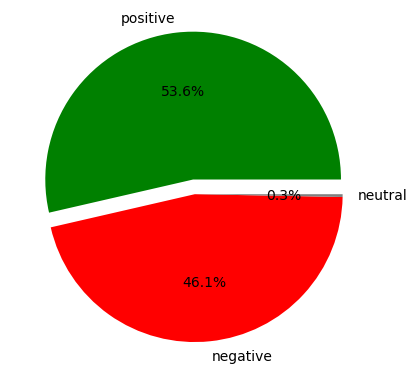

In [18]:
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

In [19]:
sentiment_analysis_df.to_csv(r"C:\Users\krish\OneDrive\Desktop\ba\Cleaned_BA_reviews.csv")


C:\Users\krish\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


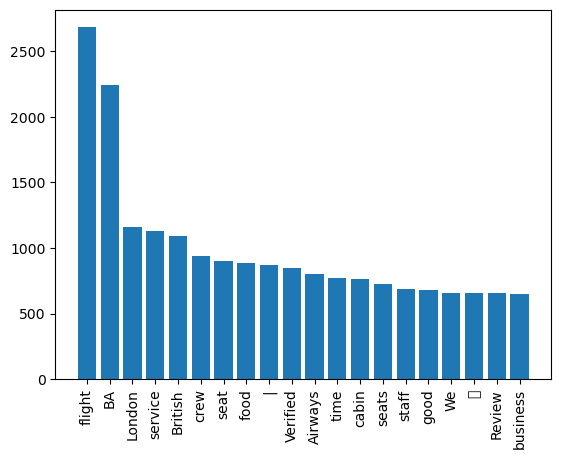

In [22]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

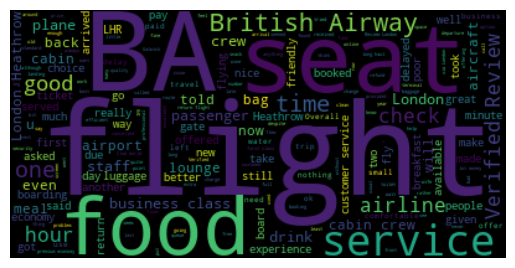

In [23]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

Key topics
The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, “seat” and “time”, showing that people are actively talking about their experience and staff